In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
def plot_kernel_grid(array):
    assert array.ndim == 4

        
    fig, axes = plt.subplots(array.shape[0], array.shape[1], figsize=(2 * array.shape[0], 2 * array.shape[1]), squeeze=False)
            
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            ax = axes[i, j]
            # Turn off axis to hide ticks and labels
            ax.axis('off')
            ax.imshow(array[i, j], cmap='RdBu_r')
    plt.show()

In [7]:
def k_vector_scalar(phi):
    return np.array([-np.sin(phi), np.cos(phi)])

def k_vector_pseudo(phi):
    return np.array([np.cos(phi), np.sin(phi)])


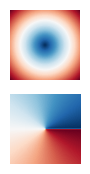

In [8]:
grid = np.linspace(-1, 1, 128)
grid = np.stack(np.meshgrid(grid, grid), axis=-1)

r = np.linalg.norm(grid, axis=-1)
phi = np.arctan2(grid[..., 1], grid[..., 0])
phi += np.pi
phi = phi[:, ::-1]



plot_kernel_grid(np.stack([r, phi], axis=0)[:, None])

In [9]:
kvs = k_vector_scalar(phi)
kvp = k_vector_pseudo(phi)

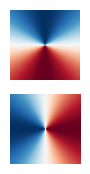

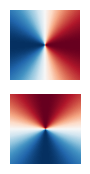

In [10]:
plot_kernel_grid(kvs[:, None])
plot_kernel_grid(kvp[:, None])

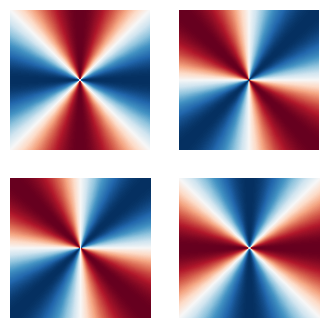

0.0

In [20]:
Sigma = np.array([[np.sin(phi) ** 2, -np.sin(phi) * np.cos(phi)], [-np.sin(phi) * np.cos(phi), np.cos(phi) ** 2]])
plot_kernel_grid(Sigma)

kvs_outer = kvs[:, None] * kvs[None, :]

np.max(np.abs(kvs_outer - Sigma))

In [21]:
Pi = np.array([[np.cos(phi) ** 2, np.sin(phi) * np.cos(phi)], [np.sin(phi) * np.cos(phi), np.sin(phi) ** 2]])

kvp_outer = kvp[:, None] * kvp[None, :]
np.max(np.abs(kvp_outer - Pi))

0.0

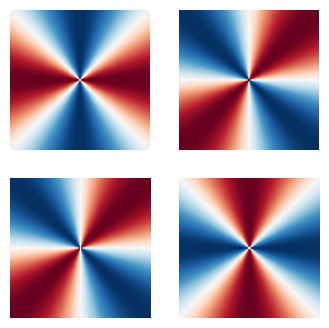

In [22]:
PimSigma = Pi - Sigma
plot_kernel_grid(PimSigma)

In [26]:
K = np.array([[np.cos(2 * phi), np.sin(2 * phi)], [np.sin(2 * phi), -np.cos(2 * phi)]])

np.max(np.abs(K - PimSigma))

2.220446049250313e-16

In [8]:
# kvs = kvs[:, None] * kvs[None, :]
# kvp = kvp[:, None] * kvp[None, :]

In [9]:
# k00 = kvs[0, 0] # * np.exp(-r**2)
# # k01 = kvs[0, 1] # * np.exp(-r**2)
# # k10 = kvs[1, 0] # * np.exp(-r**2)
# # k11 = kvs[1, 1] # * np.exp(-r**2)


# for k in [k00]:
#     plt.figure()
#     plt.imshow(k, cmap='RdBu_r')
#     plt.colorbar()


In [10]:
# k00 = kvp[0, 0] # * np.exp(-r**2)
# k01 = kvp[0, 1] # * np.exp(-r**2)
# k10 = kvp[1, 0] # * np.exp(-r**2)
# k11 = kvp[1, 1] # * np.exp(-r**2)

# for k in [k00, k01, k10, k11]:
#     plt.figure()
#     plt.imshow(k, cmap='RdBu_r')
#     plt.colorbar()

In [11]:
# k2 = kvs - kvp

# k00 = k2[0, 0] # * np.exp(-r**2)
# k01 = k2[0, 1] # * np.exp(-r**2)
# k10 = k2[1, 0] # * np.exp(-r**2)
# k11 = k2[1, 1] # * np.exp(-r**2)

# for k in [k00, k01, k10, k11]:
#     plt.figure()
#     plt.imshow(k, cmap='RdBu_r')
#     plt.colorbar()

In [36]:
import numpy as np
from scipy.integrate import quad


def integrand_vs(a, phi, i, j):
    k_vs = k_vector_scalar(phi - a)
    k_sv = k_vector_scalar(a)
    return k_vs[i] * k_sv[j]

def integrand_vp(a, phi, i, j):
    k_vp = k_vector_pseudo(phi - a)
    k_pv = k_vector_pseudo(a)
    return k_vp[i] * k_pv[j]

def compute_K_phi_vs(phi):
    K_phi = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            # Integration for each element of the matrix
            K_phi[i, j], _ = quad(integrand_vs, 0, 2*np.pi, args=(phi, i, j))
    return K_phi

def compute_K_phi_vp(phi):
    K_phi = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            # Integration for each element of the matrix
            K_phi[i, j], _ = quad(integrand_vp, 0, 2*np.pi, args=(phi, i, j))
    return K_phi



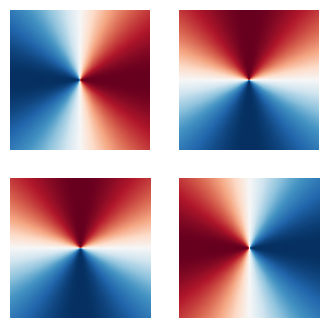

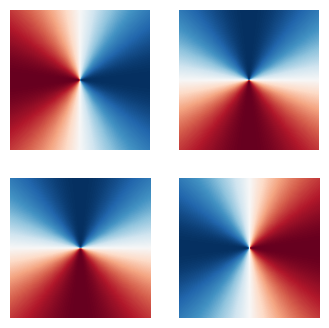

In [56]:
K_phi_vp = np.zeros((2, 2, phi.shape[0], phi.shape[1]))
K_phi_vs = np.zeros((2, 2, phi.shape[0], phi.shape[1]))

for i in range(phi.shape[0]):
    for j in range(phi.shape[1]):
        K_phi_vp[..., i, j] = compute_K_phi_vp(phi[i, j])
        K_phi_vs[..., i, j] = compute_K_phi_vs(phi[i, j])

plot_kernel_grid(K_phi_vp)
plot_kernel_grid(K_phi_vs)



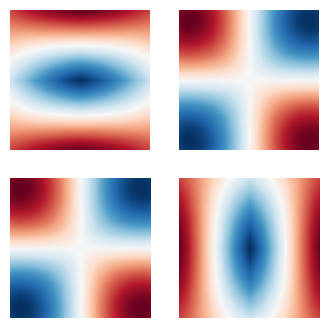

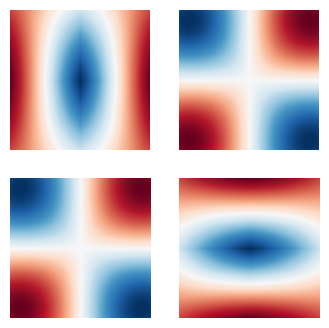

In [50]:
from scipy import signal

Pic00 = signal.convolve2d(kvs[0], kvs[0], mode='same')
Pic01 = signal.convolve2d(kvs[0], kvs[1], mode='same')
Pic10 = signal.convolve2d(kvs[1], kvs[0], mode='same')
Pic11 = signal.convolve2d(kvs[1], kvs[1], mode='same')

Pic = np.array([[Pic00, Pic01], [Pic10, Pic11]])

plot_kernel_grid(Pic)

Sig00 = signal.convolve2d(kvp[0], kvp[0], mode='same')
Sig01 = signal.convolve2d(kvp[0], kvp[1], mode='same')
Sig10 = signal.convolve2d(kvp[1], kvp[0], mode='same')
Sig11 = signal.convolve2d(kvp[1], kvp[1], mode='same')

Sig = np.array([[Sig00, Sig01], [Sig10, Sig11]])

plot_kernel_grid(Sig)





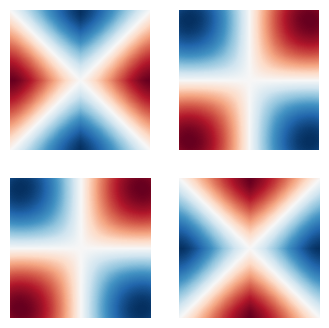

In [54]:
plot_kernel_grid(Sig - Pic)

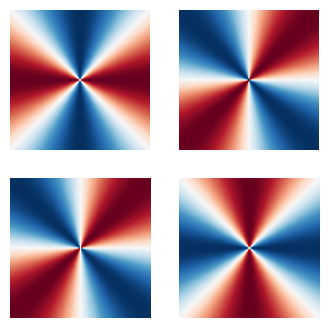

In [52]:
plot_kernel_grid(K)